rows 3 colss 20
rows 20 colss 1
valid
output will be 4 x 20
valid
output will be 4 x 1
valid
output will be 1 x 4
valid
output will be 20 x 1
output will be 4 x 20
output will be 3 x 4
valid
valid
valid


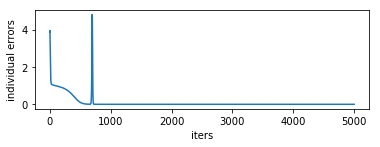

In [1]:
import numpy as np
import pyCalc as p
import random

np.random.seed(1)

p.setMode("loud")

xs = p.constant(np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ]                           
                               , dtype= float))
ys = p.constant(np.array([0,1,1,0], dtype=float)) #AxorB
#ys = p.constant(np.array([0,1,1,1], dtype=float)) #(AorB) and C

weights = 2*np.random.random((3,20)) - 1
weights2 = 2*np.random.random((20,1)) - 1

ws0 = p.variable(3,20)
ws1 = p.variable(20,1)


l1 = p.function(p.function(xs, ws0, "*"), "sigmoid")
l2 = p.function(l1,ws1, "*")

l2_error = p.function(ys.T(), l2, "-") 
tmp1 = p.function(l2_error.T(), l1, "*").T()

sig0 = p.function(l1, "sigmoid_r")
l2_errorh = p.function(xs.T(), l2_error, "rowwise*")
l1_delta = p.function(l2_errorh,sig0, "*")
tmp0 = p.function(l1_delta,ws1, "rowwise*") 


g= []
g2= []
for i in range(5000):
    t1 = weights2 + 0.1*tmp1.value(dict([(ws0,weights), (ws1,weights2)]))
    t0 = weights + 0.1*tmp0.value(dict([(ws0,weights), (ws1,weights2)]))
    weights = t0
    weights2 = t1
    g.append(sum([ d[0]*d[0] for d in l2_error.value(dict([(ws0,weights), (ws1,weights2)])).tolist()]))
                  

import matplotlib.pyplot as plt
x_data = [i for i in range(len(g))]



plt.figure(1)
plt.subplot(211)
plt.ylabel('individual errors')
plt.xlabel('iters')
plt.plot(x_data, g)
plt.show()

In [2]:
l2.value()


array([[  3.71924713e-15],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  4.94049246e-15]])

In [3]:
ys.value()

array([[ 0.,  1.,  1.,  0.]])

In [5]:
import numpy as np
import pyCalc as p
import random

np.random.seed(1)

p.setMode("quiet")

xs = p.constant(np.array([[1,2,3],[2,3,4],[3,4,5],[4,5,6] ]                           
                               , dtype= float))
ys = p.constant(np.array([6,9,12,15], dtype=float))

weights = 2*np.random.random((3,20)) - 1
weights2 = 2*np.random.random((20,1)) - 1

ws0 = p.variable(3,20)
ws1 = p.variable(20,1)


l0 = p.function(xs, ws0, "*") #4x20
l1 = p.function(l0, "sigmoid") #4x20
#l10 = p.function(l1,ws1, "*") #4x1
#l2 = p.function(l10, "sigmoid")
l2 = p.function(l1,ws1, "*")

l2_error = p.function(ys.T(), l2, "-") 
tmp1 = p.function(l2_error.T(), l1, "*").T()

sig0 = p.function(l1, "sigmoid_r")
l2_errorh = p.function(xs.T(), l2_error, "rowwise*")
l1_delta = p.function(l2_errorh,sig0, "*")
tmp0 = p.function(l1_delta,ws1, "rowwise*") 

for i in range(20000):
    t1 = weights2 + 0.01*tmp1.value(dict([(ws0,weights), (ws1,weights2)]))
    t0 = weights + 0.01*tmp0.value(dict([(ws0,weights), (ws1,weights2)]))
    weights = t0
    weights2 = t1

In [6]:
l2.value(dict([(ws0,weights), (ws1,weights2)]))

array([[  6.00738198],
       [  9.01035547],
       [ 12.01797773],
       [ 15.01875656]])

In [1]:
import numpy as np
import pyCalc as p
import random

np.random.seed(1)

p.setMode("quiet")

xs = p.constant(np.array([[1,2,3],[2,3,4],[3,4,5],[4,5,6] ]                           
                               , dtype= float))
ys = p.constant(np.array([5*i[0]+3*i[1]+5*i[2] for i in xs.value()], dtype=float))

weights = 2*np.random.random((3,20)) - 1
weights2 = 2*np.random.random((20,1)) - 1

ws0 = p.variable(3,20)
ws1 = p.variable(20,1)


l0 = p.function(xs, ws0, "*") #4x20
l1 = p.function(l0, "sigmoid") #4x20
#l10 = p.function(l1,ws1, "*") #4x1
#l2 = p.function(l10, "sigmoid")
l2 = p.function(l1,ws1, "*")

l2_error = p.function(ys.T(), l2, "-") 
tmp1 = p.function(l2_error.T(), l1, "*").T()

sig0 = p.function(l1, "sigmoid_r")
l2_errorh = p.function(xs.T(), l2_error, "rowwise*")
l1_delta = p.function(l2_errorh,sig0, "*")
tmp0 = p.function(l1_delta,ws1, "rowwise*") 

for i in range(20000):
    t1 = weights2 + 0.01*tmp1.value(dict([(ws0,weights), (ws1,weights2)]))
    t0 = weights + 0.01*tmp0.value(dict([(ws0,weights), (ws1,weights2)]))
    weights = t0
    weights2 = t1
    
l2.value(dict([(ws0,weights), (ws1,weights2)]))

array([[ 26.],
       [ 39.],
       [ 52.],
       [ 65.]])

In [2]:
ys.value()

array([[ 26.,  39.,  52.,  65.]])